# **Tugas Besar 1 Analisis Jejaring Sosial**



1.   Rifqy Muhammad Alfian - 1301200062
2.   Muhammad Reza Adi Nugraha - 1301204078
3.   Elroi Yoshua - 1301204178



# **Data Preprocessing 👷**

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import re

df = pd.read_excel('/content/nama_file.xlsx')
df

,username,tweet
0,rexalexandraxi1,"@tanyakanrl Teknik elektro,informatika,teknik ..."
1,jennisagmacade2,"WA 0811-2505-056, Tempat Prakerin Informatika ..."
2,atulgmacademy,"WA 0811-2505-056, Tempat PKL Pemasaran Area Pe..."
3,atulgmacademy,"WA 0811-2505-056, Tempat PKL Informatika Area ..."
4,atulgmacademy,"WA 0811-2505-056, Tempat PKL Multimedia Area P..."
...,...,...
578,informaatika,@schfess Davina Putri Ardini Teknik informatik...
579,indomeegoreng_,need joki informatika tugasnya ini #zonauang ...
580,strauberwy,open joki jasa tugas informatika pemrograman c...
581,semangatkatanya,@ITOOSHl @j4ketkuning @schfess Teknik informat...


In [ ]:
data = dict()
for r in df.iterrows():
    author = r[1]['username']
    tweet = r[1]['tweet']
    mentions = re.findall(r'@\w+', tweet)
    data[author] = mentions

In [ ]:
dataset = {"from":[], "to":[]}

for username_from in data:
  for username_to in data[username_from]:
    dataset["from"].append(username_from)
    dataset["to"].append(username_to.replace("@", ""))

In [ ]:
final_df = pd.DataFrame.from_dict(dataset)
final_df

,from,to
0,rexalexandraxi1,tanyakanrl
1,lylime123,schfess
2,__mochalattea,convomf
3,danxra,tanyakanrl
4,ilybilgsorry,tanyakanrl
...,...,...
197,mamanyarobert,schfess
198,informaatika,schfess
199,semangatkatanya,ITOOSHl
200,semangatkatanya,j4ketkuning


# **Network X 📔**

In [ ]:
import networkx as nx
my_graph = nx.from_pandas_edgelist(final_df, source="from", target="to")

In [ ]:
my_graph.nodes()

NodeView(('rexalexandraxi1', 'tanyakanrl', 'lylime123', 'schfess', '__mochalattea', 'convomf', 'danxra', 'ilybilgsorry', 'ducktaglia', 'makngn_', 'ridwan_hakimm', 'vascozy', 'rjczeslawa', 'hron84', 'etorphine101', 'csucsu_hun', 'rainebulaw', 'uvnchpad', 'aerestomomentum', 'fluffeeknow', 'hwngrchaa', 'gizkiya', 'articmonkaeys', 'fakyukcb', 'capiztaI', 'moonareas', 'luvjakeyhoon', 'silverq28', 'Dr_Moeldoko', 'cintacamellia', 'joysofpills', 'sooshiart', 'efcrl', 'mwilkuat', 'pahamify', 'helloarass', 'collegemenfess', 'swaggybaggyyo', 'rizqirmdabdn', 'mazzini_gsp', 'gindha_ansori', 'weirdyra', 'banjarbase', 'erkaaungu', 'kesnyu', '0vlma', 'kiazanetta__', 'vini_vidi_veci', 'skaddh', 'studyfir', 'b3doel___', 'apamungkasa', 'sisi', 'ronggengart', 'izoaya', 'Eisswerth', 'berbiegundul', 'BosRiyan', 'itsnafisa11', 'formedstud', 'golflefleurn', 'raplinrh', 'sbmptnfess', 'telkomsel', 'Zpozy22', 'reinmadava', 'Xixixix131', 'live_bogor', 'worksfess', 'efbr_', 'shelpie16', 'snbtfess', 'loghanaja', 's

In [ ]:
my_graph.edges()

EdgeView([('rexalexandraxi1', 'tanyakanrl'), ('tanyakanrl', 'danxra'), ('tanyakanrl', 'ilybilgsorry'), ('tanyakanrl', 'aerestomomentum'), ('tanyakanrl', 'gizkiya'), ('lylime123', 'schfess'), ('schfess', 'articmonkaeys'), ('schfess', 'luvjakeyhoon'), ('schfess', 'efcrl'), ('schfess', 'serigalc'), ('schfess', 'liimitmikasa'), ('schfess', 'rivianjr_'), ('schfess', 'mamanyarobert'), ('schfess', 'informaatika'), ('schfess', 'semangatkatanya'), ('__mochalattea', 'convomf'), ('convomf', 'rjczeslawa'), ('convomf', 'capricorngurlll'), ('convomf', 'ar_besaarr'), ('ducktaglia', 'makngn_'), ('ridwan_hakimm', 'vascozy'), ('hron84', 'etorphine101'), ('hron84', 'csucsu_hun'), ('rainebulaw', 'uvnchpad'), ('fluffeeknow', 'hwngrchaa'), ('fakyukcb', 'capiztaI'), ('fakyukcb', 'moonareas'), ('silverq28', 'Dr_Moeldoko'), ('Dr_Moeldoko', 'cintacamellia'), ('Dr_Moeldoko', '0vlma'), ('Dr_Moeldoko', 'kiazanetta__'), ('Dr_Moeldoko', 'vini_vidi_veci'), ('Dr_Moeldoko', 'b3doel___'), ('Dr_Moeldoko', 'ronggengart'),

# **Visualisasi Data 📊**

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

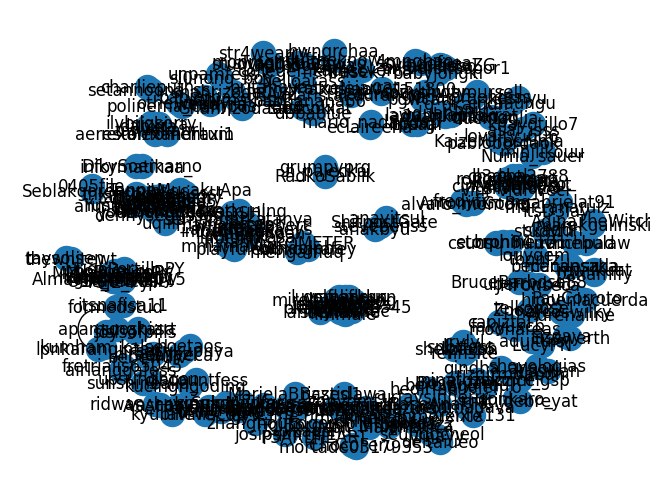

In [ ]:
nx.draw(my_graph, with_labels=True)

# **Centrality 🎯**

In [ ]:
most_influential = nx.closeness_centrality(my_graph)
most_influential_closeness = dict(sorted(most_influential.items(), key=lambda item: item[1], reverse=True))
most_influential_closeness

{'worksfess': 0.05489659367396593,
 'sbmptnfess': 0.05132299270072993,
 'schfess': 0.039740470397404706,
 'pereyra': 0.03680048661800486,
 'exxtencity': 0.03467153284671533,
 'dennyseggssegar': 0.03293795620437956,
 'droboto_': 0.03293795620437956,
 'ahmadrizqicahy2': 0.03293795620437956,
 'Dr_Moeldoko': 0.032846715328467155,
 'hugoportillopy': 0.03154327424400417,
 'live_bogor': 0.0313694820994091,
 'efbr_': 0.0313694820994091,
 'loghanaja': 0.0313694820994091,
 'yourfictionboys': 0.0313694820994091,
 'hapisakbr': 0.0313694820994091,
 'nhodnhed': 0.0313694820994091,
 'bukandeng': 0.0313694820994091,
 'dainousa': 0.0313694820994091,
 'tahuuubacem': 0.0313694820994091,
 'beraksaurus': 0.0313694820994091,
 'okalangi23': 0.0293274244004171,
 'golflefleurn': 0.028316133903850998,
 'raplinrh': 0.028316133903850998,
 'yaastdy': 0.02737226277372263,
 'mwacxn': 0.02737226277372263,
 'shennvhe': 0.02737226277372263,
 'mirebusgoreng': 0.02737226277372263,
 'masukptn345': 0.02737226277372263,
 'i

In [ ]:
most_influential = nx.degree_centrality(my_graph)
most_influential_degree = dict(sorted(most_influential.items(), key=lambda item: item[1], reverse=True))
most_influential_closeness

{'worksfess': 0.05489659367396593,
 'sbmptnfess': 0.05132299270072993,
 'schfess': 0.039740470397404706,
 'pereyra': 0.03680048661800486,
 'exxtencity': 0.03467153284671533,
 'dennyseggssegar': 0.03293795620437956,
 'droboto_': 0.03293795620437956,
 'ahmadrizqicahy2': 0.03293795620437956,
 'Dr_Moeldoko': 0.032846715328467155,
 'hugoportillopy': 0.03154327424400417,
 'live_bogor': 0.0313694820994091,
 'efbr_': 0.0313694820994091,
 'loghanaja': 0.0313694820994091,
 'yourfictionboys': 0.0313694820994091,
 'hapisakbr': 0.0313694820994091,
 'nhodnhed': 0.0313694820994091,
 'bukandeng': 0.0313694820994091,
 'dainousa': 0.0313694820994091,
 'tahuuubacem': 0.0313694820994091,
 'beraksaurus': 0.0313694820994091,
 'okalangi23': 0.0293274244004171,
 'golflefleurn': 0.028316133903850998,
 'raplinrh': 0.028316133903850998,
 'yaastdy': 0.02737226277372263,
 'mwacxn': 0.02737226277372263,
 'shennvhe': 0.02737226277372263,
 'mirebusgoreng': 0.02737226277372263,
 'masukptn345': 0.02737226277372263,
 'i

# **Top 5 Most Influential User 🥇**

In [ ]:
print("Top 5 Most Influential User (Closeness Centrality)")
count = 1
for k, v in most_influential_closeness.items():
  print("[{}] User : {}\nScore : {}\n".format(count,k,v))
  count +=1
  if count == 6:
    break

Top 5 Most Influential User (Closeness Centrality)
[1] User : worksfess
Score : 0.05489659367396593

[2] User : sbmptnfess
Score : 0.05132299270072993

[3] User : schfess
Score : 0.039740470397404706

[4] User : pereyra
Score : 0.03680048661800486

[5] User : exxtencity
Score : 0.03467153284671533



In [ ]:
print("Top 5 Most Influential User (Degree Centrality)")
count = 1
for k, v in most_influential_degree.items():
  print("[{}] User : {}\nScore : {}\n".format(count,k,v))
  count +=1
  if count == 6:
    break

Top 5 Most Influential User (Degree Centrality)
[1] User : sbmptnfess
Score : 0.051094890510948905

[2] User : worksfess
Score : 0.051094890510948905

[3] User : schfess
Score : 0.0364963503649635

[4] User : pereyra
Score : 0.0364963503649635

[5] User : Dr_Moeldoko
Score : 0.032846715328467155

